# data gen

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import os

os.chdir("../")

output_domain_size_dict = {
    "smartgrid-1": (3, 12),
    "prob-termination-5": (6, 10),
    "prob-termination-7": (8, 10),
    "smartgrid-2": (9, 12),
    "prob-termination-9": (10, 10),
    "prob-termination-12": (13, 20),
    "reservoir-4": (16, 4),
    "window-20": (20, 20),
    "window-24": (24, 24),
    "smartgrid-3": (27, 12),
    "window-28": (28, 28),
    "window-32": (32, 32),
    "reservoir-6": (64, 8),
    "smartgrid-4": (81, 12),
    "smartgrid-5": (243, 12),
    "reservoir-8": (256, 16),
    "random-walk-3": (500, 24),
    "random-walk-5": (500, 31),
    "random-walk-7": (500, 33),
    "random-walk-14": (500, 40),
    "reservoir-10": (1024, 32),
    "reservoir-12": (4096, 64),
}
subject_name_map = {
    "smartgrid-1": "SG1",
    "smartgrid-2": "SG2",
    "prob-termination-5": "PT5",
    "prob-termination-7": "PT7",
    "prob-termination-9": "PT9",
    "prob-termination-12": "PT12",
    "smartgrid-3": "SG3",
    "reservoir-6": "RV6",
    "window-20": "WD20",
    "window-24": "WD24",
    "window-28": "WD28",
    "window-32": "WD32",
    "smartgrid-4": "SG4",
    "smartgrid-5": "SG5",
    "reservoir-8": "RV8",
    "random-walk-14": "RW14",
    "random-walk-3": "RW3",
    "random-walk-5": "RW5",
    "random-walk-7": "RW7",
    "reservoir-10": "RV10",
    "reservoir-4": "RV4",
    "reservoir-12": "RV12",
}

subject_order = [
    "PT5",
    "PT7",
    "PT9",
    "PT12",
    "RW3",
    "RW5",
    "RW7",
    "RW14",
    "RV4",
    "RV6",
    "RV8",
    "RV10",
    "RV12",
    "SG1",
    "SG2",
    "SG3",
    "SG4",
    "SG5",
    "WD20",
    "WD24",
    "WD28",
    "WD32",
]

method_order = [
    "empirical",
    "ChaoFON",
    "ChaoFRN",
    "ChaoION",
    "ChaoIRN",
    "miller",
    "ChaoFOM",
    "ChaoFRM",
    "ChaoIOM",
    "ChaoIRM",
    "HyLeak",
]

method_rename = {
    "empirical": "Empirical",
    "miller": "Miller",
    "HyLeak": "HyLeak",
    "ChaoFON": "ChaoFON",
    "ChaoFRN": "ChaoFRN",
    "ChaoION": "ChaoSON",
    "ChaoIRN": "ChaoSRN",
    "ChaoFOM": "ChaoFOM",
    "ChaoFRM": "ChaoFRM",
    "ChaoIOM": "ChaoSOM",
    "ChaoIRM": "ChaoSRM",
}

In [2]:
df = pd.DataFrame(
    columns=["subject", "GT", "ratio", "method", "MI", "SE", "o.e."]
)

for subject in output_domain_size_dict.keys():
    data_path = f"result/esti-merged-{subject}-i-xy.csv"
    if os.path.exists(data_path) == False:
        print(f"WARN: {data_path} not found")
    data = pd.read_csv(data_path)
    GT = data["GT"].values[0]
    data = data.drop(columns=["GT"])
    data_melt = data.melt(
        id_vars=["Nx", "trial"], var_name="method", value_name="MI"
    )
    # var order to method_order
    data_melt["method"] = pd.Categorical(data_melt["method"], method_order)
    # rename method
    data_melt["method"] = data_melt["method"].map(method_rename)
    data_melt["SE"] = (data_melt["MI"] - GT) ** 2
    data_mean = (
        data_melt.drop(columns=["SE"])
        .groupby(["Nx", "method"], observed=False)
        .mean()
        .reset_index()
        .drop(columns=["trial"])
    )
    data_mse = (
        data_melt.drop(columns=["MI"])
        .groupby(["Nx", "method"], observed=False)
        .mean()
        .reset_index()
        .drop(columns=["trial"])
    )
    data_mean = data_mean.merge(data_mse, on=["Nx", "method"])
    NS_x, NS_y = output_domain_size_dict[subject]
    data_mean["ratio"] = data_mean["Nx"] / NS_y
    data_mean.loc[data_mean["ratio"] < 1, "ratio"] = 0.5
    data_mean["subject"] = subject_name_map[subject]
    data_mean["GT"] = GT
    data_mean["o.e."] = data_mean["MI"] - GT > 0
    df = pd.concat([df, data_mean], ignore_index=True)
df = df.dropna(subset=["MI"])
df["bias"] = df["MI"] - df["GT"]
display(df)

/tmp/ipykernel_3304669/3699446032.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, data_mean], ignore_index=True)
/tmp/ipykernel_3304669/3699446032.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, data_mean], ignore_index=True)


,subject,GT,ratio,method,MI,SE,o.e.,Nx,bias
0,SG1,0.065825,0.5,Empirical,0.394855,0.127088,True,6.0,0.329030
1,SG1,0.065825,0.5,ChaoFON,0.442915,0.161000,True,6.0,0.377090
2,SG1,0.065825,0.5,ChaoFRN,0.398220,0.130445,True,6.0,0.332395
3,SG1,0.065825,0.5,ChaoSON,0.340180,0.096639,True,6.0,0.274355
4,SG1,0.065825,0.5,ChaoSRN,0.308041,0.075884,True,6.0,0.242216
...,...,...,...,...,...,...,...,...,...
963,RV12,1.604873,5.0,ChaoFOM,1.774327,0.028717,True,320.0,0.169454
964,RV12,1.604873,5.0,ChaoFRM,1.776545,0.029474,True,320.0,0.171672
965,RV12,1.604873,5.0,ChaoSOM,1.625853,0.000441,True,320.0,0.020980
966,RV12,1.604873,5.0,ChaoSRM,1.625842,0.000441,True,320.0,0.020969


# Mean bias, MSE boxplot

/tmp/ipykernel_3304669/3085478554.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_3304669/3085478554.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=18)


<Axes: xlabel='Sample Ratio', ylabel='Mean Bias'>

/tmp/ipykernel_3304669/3085478554.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_3304669/3085478554.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=18)


<Axes: xlabel='Sample Ratio', ylabel='MSE'>

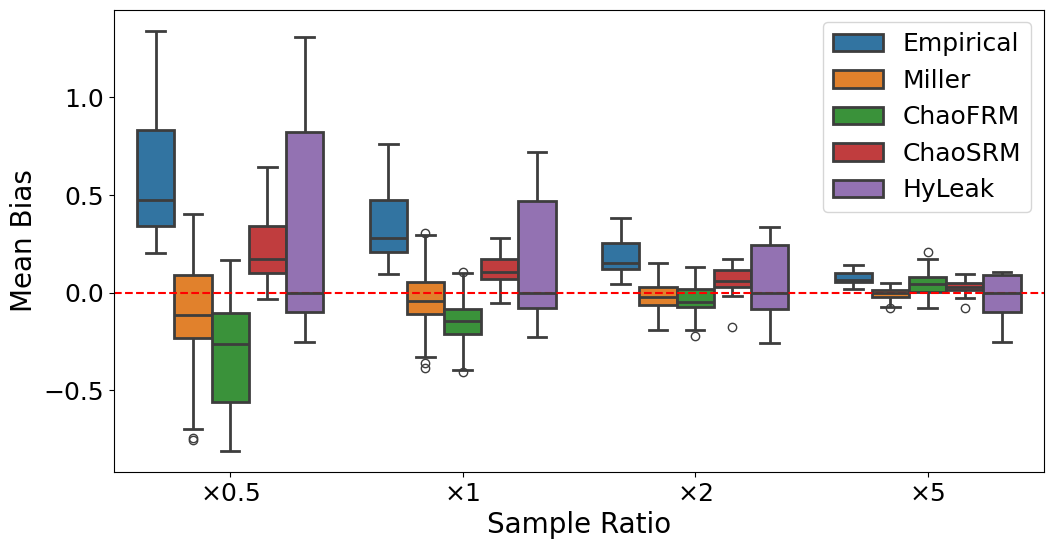

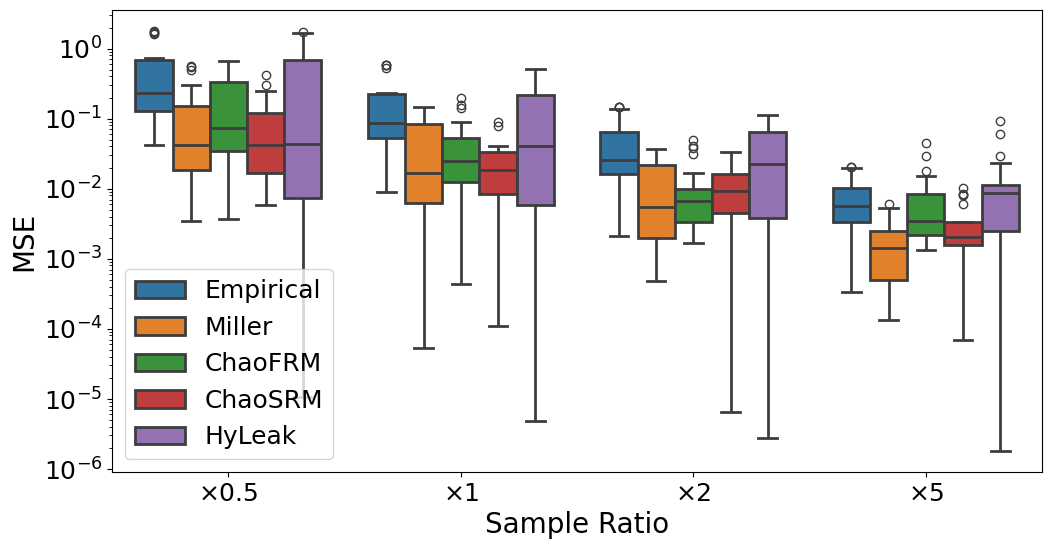

In [3]:
method_order = ["Empirical", "Miller", "ChaoFRM", "ChaoSRM", "HyLeak"]
df_temp = df.drop(columns=["GT", "MI"])
df_temp = df_temp.loc[df_temp["method"].isin(method_order)]
df_temp["method"] = pd.Categorical(df_temp["method"], method_order)

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x="ratio",
    y="bias",
    hue="method",
    data=df_temp,
    ax=ax,
    linewidth=2,
)
ax.axhline(y=0, color="red", linestyle="--")
ax.set_xlabel(r"Sample Ratio", fontsize=20)
ax.set_xticklabels(
    [r"$\times$0.5", r"$\times$1", r"$\times$2", r"$\times$5"], fontsize=18
)
ax.set_ylabel(r"Mean Bias", fontsize=20)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels(yticklabels, fontsize=18)
ax.legend(loc="upper right", ncol=1, fontsize=18)
display(ax)
fig.savefig("figures/rq1-result-bias.pdf", bbox_inches="tight")

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x="ratio",
    y="SE",
    hue="method",
    data=df_temp,
    ax=ax,
    linewidth=2,
)
ax.set_xlabel(r"Sample Ratio", fontsize=20)
ax.set_xticklabels(
    [r"$\times$0.5", r"$\times$1", r"$\times$2", r"$\times$5"], fontsize=18
)
ax.set_ylabel(r"MSE", fontsize=20)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels(yticklabels, fontsize=18)
ax.legend(loc="lower left", ncol=1, fontsize=18)
ax.set_yscale("log")

display(ax)
# save
fig.savefig("figures/rq1-result-mse.pdf", bbox_inches="tight")

In [4]:
data = []

for subject in output_domain_size_dict.keys():
    # print(f"subject: {subject}")
    s_xy_path = os.path.join("data1M/", f"{subject}-s-xy.csv")
    s_xy = np.loadtxt(s_xy_path, delimiter=",", dtype=int)
    p_xy = s_xy / np.sum(s_xy)
    input_domain_size, output_domain_size = s_xy.shape
    num_zero_event = np.sum(s_xy == 0)
    num_samples_ratio = np.array([0.5, 1, 2, 5])
    num_samples = num_samples_ratio * output_domain_size * input_domain_size
    for idx, sample_size in enumerate(num_samples):
        num_rare_event = np.sum(p_xy < 1 / sample_size)
        Miller_oe = df.loc[
            (df["subject"] == subject_name_map[subject])
            & (df["ratio"] == num_samples_ratio[idx])
            & (df["method"] == "Miller"),
            "o.e.",
        ].values[0]
        ChaoSRM_oe = df.loc[
            (df["subject"] == subject_name_map[subject])
            & (df["ratio"] == num_samples_ratio[idx])
            & (df["method"] == "ChaoSRM"),
            "o.e.",
        ].values[0]
        data.append(
            [
                subject_name_map[subject],
                input_domain_size,
                output_domain_size,
                input_domain_size * output_domain_size,
                num_zero_event,
                num_zero_event / (input_domain_size * output_domain_size) * 100,
                num_samples_ratio[idx],
                sample_size,
                "Over" if Miller_oe else "Under",
                "Over" if ChaoSRM_oe else "Under",
            ]
        )
df2 = pd.DataFrame(
    data,
    columns=[
        "subject",
        "|X|",
        "|Y|",
        "|XY|",
        "p=0",
        "r(p=0)",
        "r(N)",
        "N",
        "Miller",
        "ChaoSRM",
    ],
)

subject_order = [
    "PT5",
    "PT7",
    "PT9",
    "PT12",
    "RW3",
    "RW5",
    "RW7",
    "RW14",
    "RV4",
    "RV6",
    "RV8",
    "RV10",
    "RV12",
    "SG1",
    "SG2",
    "SG3",
    "SG4",
    "SG5",
    "WD20",
    "WD24",
    "WD28",
    "WD32",
]
df2["subject"] = pd.Categorical(df2["subject"], subject_order)
df2 = df2.sort_values(by=["subject", "r(N)"])
df2

,subject,|X|,|Y|,|XY|,p=0,r(p=0),r(N),N,Miller,ChaoSRM
4,PT5,6,10,60,19,31.666667,0.5,30.0,Under,Over
5,PT5,6,10,60,19,31.666667,1.0,60.0,Under,Over
6,PT5,6,10,60,19,31.666667,2.0,120.0,Under,Over
7,PT5,6,10,60,19,31.666667,5.0,300.0,Under,Over
8,PT7,8,10,80,21,26.250000,0.5,40.0,Under,Over
...,...,...,...,...,...,...,...,...,...,...
43,WD28,28,28,784,0,0.000000,5.0,3920.0,Over,Over
44,WD32,32,32,1024,0,0.000000,0.5,512.0,Over,Over
45,WD32,32,32,1024,0,0.000000,1.0,1024.0,Over,Over
46,WD32,32,32,1024,0,0.000000,2.0,2048.0,Over,Over


# Over/Underestimation

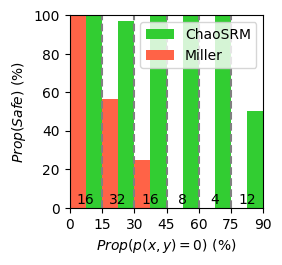

In [5]:
rp0_data = []
bins = [0, 15, 30, 45, 60, 75, 90]
num_configs = []
# histogram
for bin_idx in range(len(bins) - 1):
    rang = [bins[bin_idx], bins[bin_idx + 1]]
    miller_oep = (
        df2[
            (df2["r(p=0)"] >= rang[0])
            & (df2["r(p=0)"] < rang[1])
            & (df2["Miller"] == "Over")
        ].shape[0]
        / df2[(df2["r(p=0)"] >= rang[0]) & (df2["r(p=0)"] < rang[1])].shape[0]
        * 100
    )
    chaosrm_oep = (
        df2[
            (df2["r(p=0)"] >= rang[0])
            & (df2["r(p=0)"] < rang[1])
            & (df2["ChaoSRM"] == "Over")
        ].shape[0]
        / df2[(df2["r(p=0)"] >= rang[0]) & (df2["r(p=0)"] < rang[1])].shape[0]
        * 100
    )
    num_config = df2[
        (df2["r(p=0)"] >= rang[0]) & (df2["r(p=0)"] < rang[1])
    ].shape[0]
    rp0_data.append([rang[0], rang[1], miller_oep, chaosrm_oep])
    num_configs.append(num_config)
rp0_df = pd.DataFrame(rp0_data, columns=["min", "max", "Miller", "ChaoSRM"])
rp0_df["mid"] = (rp0_df["min"] + rp0_df["max"]) / 2
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plt.bar(
    [v + 3.75 for v in rp0_df["mid"].values],
    rp0_df["ChaoSRM"].values,
    color="limegreen",
    label="ChaoSRM",
    width=7.5,
)
plt.bar(
    [v - 3.75 for v in rp0_df["mid"].values],
    rp0_df["Miller"].values,
    color="tomato",
    label="Miller",
    width=7.5,
)
# legend
ax.legend(loc="upper right", ncol=1, fontsize=10)
# x ticks
ax.set_xticks(bins)
ax.set_ylim([0, 100])
ax.set_xlim([min(rp0_df["min"].values), max(rp0_df["max"].values)])
ax.set_xlabel(r"$Prop(p(x,y)=0)$ (%)")
ax.set_ylabel(r"$Prop(Safe)$ (%)")
# print num_config above the x axis
for bin_idx in range(len(bins) - 1):
    ax.text(
        x=(bins[bin_idx] + bins[bin_idx + 1]) / 2,
        y=0.5,
        s=f"{num_configs[bin_idx]}",
        horizontalalignment="center",
        verticalalignment="bottom",
        fontsize=10,
    )
# vertical dashed line for bins
for bin_idx in range(len(bins) - 1):
    ax.axvline(x=bins[bin_idx], color="grey", linestyle="--")
fig.savefig("figures/miller-oe-rp0.pdf", bbox_inches="tight")

# Statistical tests for RQ1

In [6]:
from scipy import stats


def sttest(method1, method2, ratio=None):
    df_temp = df.loc[df["ratio"] == ratio] if ratio else df
    mse_m1 = df_temp[df_temp["method"] == method1]["SE"].values
    mse_m2 = df_temp[df_temp["method"] == method2]["SE"].values
    stat, p = stats.wilcoxon(mse_m1, mse_m2, alternative="greater")
    print(
        f"({len(mse_m1)}) method1: {method1} ({np.mean(mse_m1):.4f}), method2: {method2} ({np.mean(mse_m2):.4f}), ratio: {ratio}, p: {p:.4f}"
    )


for ratio in [0.5, 1, 2, 5]:
    for m1, m2 in [
        ("Empirical", "Miller"),
        ("Empirical", "ChaoFRM"),
        ("Empirical", "ChaoSRM"),
        ("Empirical", "HyLeak"),
        ("Miller", "ChaoFRM"),
        ("Miller", "ChaoSRM"),
        ("Miller", "HyLeak"),
        ("ChaoFRM", "ChaoSRM"),
        ("ChaoFRM", "HyLeak"),
        ("ChaoSRM", "HyLeak"),
    ]:
        sttest(m1, m2, ratio)

(22) method1: Empirical (0.5415), method2: Miller (0.1315), ratio: 0.5, p: 0.0042
(22) method1: Empirical (0.5415), method2: ChaoFRM (0.1870), ratio: 0.5, p: 0.0138
(22) method1: Empirical (0.5415), method2: ChaoSRM (0.0902), ratio: 0.5, p: 0.0000
(22) method1: Empirical (0.5415), method2: HyLeak (0.4450), ratio: 0.5, p: 0.0000
(22) method1: Miller (0.1315), method2: ChaoFRM (0.1870), ratio: 0.5, p: 0.9009
(22) method1: Miller (0.1315), method2: ChaoSRM (0.0902), ratio: 0.5, p: 0.5881
(22) method1: Miller (0.1315), method2: HyLeak (0.4450), ratio: 0.5, p: 0.9508
(22) method1: ChaoFRM (0.1870), method2: ChaoSRM (0.0902), ratio: 0.5, p: 0.2940
(22) method1: ChaoFRM (0.1870), method2: HyLeak (0.4450), ratio: 0.5, p: 0.8826
(22) method1: ChaoSRM (0.0902), method2: HyLeak (0.4450), ratio: 0.5, p: 0.9508
(22) method1: Empirical (0.1788), method2: Miller (0.0427), ratio: 1, p: 0.0026
(22) method1: Empirical (0.1788), method2: ChaoFRM (0.0465), ratio: 1, p: 0.0014
(22) method1: Empirical (0.17

# Statistical tests for RQ2

In [7]:
sttest("Empirical", "ChaoFON")
sttest("Empirical", "ChaoFRN")
sttest("Empirical", "ChaoSON")
sttest("Empirical", "ChaoSRN")

(88) method1: Empirical (0.1941), method2: ChaoFON (0.0462), ratio: None, p: 0.0001
(88) method1: Empirical (0.1941), method2: ChaoFRN (0.0393), ratio: None, p: 0.0000
(88) method1: Empirical (0.1941), method2: ChaoSON (0.0636), ratio: None, p: 0.0000
(88) method1: Empirical (0.1941), method2: ChaoSRN (0.0514), ratio: None, p: 0.0000


In [8]:
sttest("ChaoFON", "ChaoSON")
sttest("ChaoFRN", "ChaoSRN")
print()
sttest("ChaoFON", "ChaoFRN")
sttest("ChaoSON", "ChaoSRN")

(88) method1: ChaoFON (0.0462), method2: ChaoSON (0.0636), ratio: None, p: 0.4801
(88) method1: ChaoFRN (0.0393), method2: ChaoSRN (0.0514), ratio: None, p: 0.4701

(88) method1: ChaoFON (0.0462), method2: ChaoFRN (0.0393), ratio: None, p: 0.0000
(88) method1: ChaoSON (0.0636), method2: ChaoSRN (0.0514), ratio: None, p: 0.0000


In [9]:
sttest("Empirical", "Miller")
sttest("ChaoFRN", "ChaoFRM")
sttest("ChaoSRN", "ChaoSRM")

(88) method1: Empirical (0.1941), method2: Miller (0.0469), ratio: None, p: 0.0000
(88) method1: ChaoFRN (0.0393), method2: ChaoFRM (0.0634), ratio: None, p: 0.3073
(88) method1: ChaoSRN (0.0514), method2: ChaoSRM (0.0324), ratio: None, p: 0.0000
